# ЦЕЛЬ ПРОЕКТА
Наш проект направлен на исследование того, как в японских СМИ и на туристических сайтах описывается Сахалин, а также какие темы и впечатления преобладают в этих текстах. Мы соберём данные с новостных сайтов и туристических порталов, проведем обширный анализ и  визуализируем результаты.

❓ **Исследовательский вопрос:**

"Как сегодня представлен Сахалин на сайтах туристических компаний, и вообще в
Интернет-пространстве стран Азии. В том числе у блогеров, путешественников."

❗️ **Итоговый результат:**

подготовка презентации, где будут представлены визуализации и выводы, к которым нам удалось прийти благодаря собранным данным.


# Анализ данных с новостного портала YAHOO.JP

## 📮 Yahoo!ニュース

На первом этапе исследования мы рассматриваем, как Сахалин представлен в японских СМИ на примере крупнейшего новостного агрегатора Yahoo!ニュース.
Этот источник позволяет охватить широкий спектр тем — от политики и экономики до общества, культуры и экологии, — а также там собраны публикации из множества разных медиа.

Это поможет нам не только на конкретном кейсе разобраться как собирать и анализировать данные, но и получить объемную картину образа Сахалина в японоязычных новостях.


## 📦 Библиотеки в Python

В Python есть базовый набор функций, но для более сложных задач (например, анализ текста, визуализация, машинное обучение) нужны дополнительные инструменты, которые разработаны другими людьми. Эти инструменты называются библиотеками.

💡 Почему их стоит установить и загрузить в самом начале кода:


*   Ничего не забудем и не потеряем
*   Не придется загружать большие библиотеки несколько раз
*   Просто удобно видеть все инструменты проекта, особенно если работаете в группе

In [ ]:
# Загружаем все необходимые библиотеки -
# они позволят нам использовать различные функции

# Лучше прописывать эту часть в самом начале,
# чтобы ничего не забыть и не загружать одно и то же

!pip install janome
!pip install gensim
!pip install pyvis

import json
import requests
from bs4 import BeautifulSoup
import gdown
import os
import pandas as pd
from datetime import datetime
from time import sleep

from janome.tokenizer import Tokenizer
import re
from collections import Counter

!apt-get -q install fonts-ipafont-gothic
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from wordcloud import WordCloud

from gensim import corpora, models

import networkx as nx
from itertools import combinations


from pyvis.network import Network
from itertools import combinations
import numpy as np
from matplotlib import cm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (14.4 MB/s)
Selecting 

# Ключевое слово - サハリン

### 🗂 Парсинг

Для выявления наиболее актуальных тенденций мы проведем поиск новостей на Yahoo Japan по ключевому слову 「サハリン」 (Сахалин).
Этот запрос позволяет собрать публикации, где Сахалин упоминается в самых разных контекстах.



---


Начнем мы со сбора данных для работы, а именно парсинга.

**Парсинг** (от англ. parsing) — это автоматический способ сбора информации с веб-сайтов.
С помощью специального кода программа открывает страницы в интернете, «читает» их так же, как это делает человек, и извлекает нужные элементы — например, заголовки новостей, даты публикации, тексты статей или ссылки. Этот метод помогает намного сократить затрачиваемое время и сосредоточиться на более важных аспектах исследования.


### Парсинг - как это делается?

Процесс парсинга обычно делится на два основных этапа:


---



**🌐 Сбор ссылок**

Для начала необходимо собрать ссылки страничек, данные которых мы хотим получить. Без этого "адреса" программа просто не поймет откуда брать информацию.



---


**🗄 Сбор данных**

Затем программа переходит по каждой найденной ссылке и сохраняет нужную информацию, мы сами выбираем какие аспекты важны для анализа.




*В нашем случае это будет:*

- дата публикации
- заголовок статьи
- основной текст статьи


---



Все эти данные мы поместим в эксель таблицу, что позволяет потом легко их анализировать: искать часто встречающиеся слова, считать количество упоминаний, делать визуализации.

Таким образом, парсинг позволяет создать собственный небольшой корпус текстов по нужной теме и использовать его для анализа содержания.

In [ ]:
# СБОР ССЫЛОК


# Внешние файлы, необходимые для страниц, которые показываются только по кнопке "もっと見る"
file_ids = {
    "sakhalin_json1.json": "1Aj9q-5bKwucX-6v3sC7-ih5oHtKRZyjm",
    "sakhalin_json2.json": "1s3ZnYV7hifoDBfYzdL63YNmigJoLIlK8",
    "sakhalin_json3.json": "1Te4hA5PenENzIsnYSHcU8dk1UScecyWH",
    "sakhalin_json4.json": "1FGsP2ukj2wDUl_hEsl752zV2ZjFqnxab"
}

# Скачиваем эти файлы
for name, fid in file_ids.items():
    if not os.path.exists(name):
        print(f"⬇️ Скачиваю {name} ...")
        gdown.download(f"https://drive.google.com/uc?id={fid}", name, quiet=False)
print("✅ Все JSON-файлы загружены\n")

# --- 1. Получаем HTML со первой страницы поиска ---
url = "https://news.yahoo.co.jp/search?p=サハリン&ei=utf-8"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# --- 2. Извлекаем ссылки из HTML ---
data = soup.find_all("li", class_="sc-1u4589e-0 kKmBYF")
links = []

for item in data:
    a_tag = item.find("a", href=True)
    if a_tag:
        links.append(a_tag["href"])

# --- 3. Подгружаем ссылки из файлов ---
for file_name in file_ids.keys():
    with open(file_name, "r", encoding="utf-8") as f:
        file = json.load(f)
        for entry in file["contents"]:
            links.append(entry["permalink"])

# --- 4. Сохраняем все ссылки в txt ---
with open("sakhalin_links.txt", "w", encoding="utf-8") as f:
    for link in links:
        f.write(link + "\n")

# --- 5. Выводим результаты сбора для проверки ---

print(f"📰 Всего сохранено ссылок: {len(links)}")

for link in links:
  print(link)


⬇️ Скачиваю sakhalin_json1.json ...


Downloading...
From: https://drive.google.com/uc?id=1Aj9q-5bKwucX-6v3sC7-ih5oHtKRZyjm
To: /content/sakhalin_json1.json
100%|██████████| 71.2k/71.2k [00:00<00:00, 61.8MB/s]


⬇️ Скачиваю sakhalin_json2.json ...


Downloading...
From: https://drive.google.com/uc?id=1s3ZnYV7hifoDBfYzdL63YNmigJoLIlK8
To: /content/sakhalin_json2.json
100%|██████████| 73.7k/73.7k [00:00<00:00, 48.9MB/s]


⬇️ Скачиваю sakhalin_json3.json ...


Downloading...
From: https://drive.google.com/uc?id=1Te4hA5PenENzIsnYSHcU8dk1UScecyWH
To: /content/sakhalin_json3.json
100%|██████████| 71.2k/71.2k [00:00<00:00, 68.0MB/s]


⬇️ Скачиваю sakhalin_json4.json ...


Downloading...
From: https://drive.google.com/uc?id=1FGsP2ukj2wDUl_hEsl752zV2ZjFqnxab
To: /content/sakhalin_json4.json
100%|██████████| 60.2k/60.2k [00:00<00:00, 15.4MB/s]


✅ Все JSON-файлы загружены

📰 Всего сохранено ссылок: 245
https://news.yahoo.co.jp/articles/a6e58762ef514e63378b32d710f4e7989423c63c
https://news.yahoo.co.jp/articles/8ca6272da2413e9af2ed147a443f3b5cf4244f17
https://news.yahoo.co.jp/articles/3f9d6865c1b00b22e4b321b83e515185a96c51b1
https://news.yahoo.co.jp/articles/3a6a1fa662d8ad65fa36f5719bb1f1e9e1286103
https://news.yahoo.co.jp/articles/29f762129a3f34e7c4863a338d22b9c7c4d53dde
https://news.yahoo.co.jp/articles/ee7cc2848ba254d35a374c085f08758e4dec243e
https://news.yahoo.co.jp/articles/beae9c088648f3c47aedb48dc86b67432770934b
https://news.yahoo.co.jp/articles/2063483c299c4568acb34071dc52cc64691670f3
https://news.yahoo.co.jp/articles/05661d6e7f4daeb8ec7047a530f06ee87cb67d2e
https://news.yahoo.co.jp/articles/bc1aac39c0be8faecd8d6ae4ed9c008c01cb40bd
https://news.yahoo.co.jp/articles/f8b02fc20eda4b238081131eb525ff1eba721a09
https://news.yahoo.co.jp/articles/a821f132c6fe58437c3f315450ca15a80a14f531
https://news.yahoo.co.jp/articles/8c0423c4

In [ ]:
# СБОР ДАННЫХ

CURRENT_YEAR = 2025  # год по умолчанию, если в дате нет года


# --- Функции ---

# Очистка заголовка от ненужных символов
def legalize(s):
    forbidden = ['*', '/', ':', '<', '>', '?', '+', '|', '"', '\\']
    for ch in forbidden:
        s = s.replace(ch, '')
    return s.strip()


# Преобразование формата даты (из японского "2015/7/24(金) 12:46" в формат "24.07.2025")
def format_date(s):

    if not s:
        return "Неизвестно"

    date_part = s.split("(")[0].split()[0]

    parts = date_part.split("/")
    if len(parts) == 3:
        year, month, day = parts
    elif len(parts) == 2:
        month, day = parts
        year = str(CURRENT_YEAR)
    else:
        return s

    try:
        dt = datetime(int(year), int(month), int(day))
        return dt.strftime("%d.%m.%Y")
    except ValueError:
        return s


# --- Загружаем все ссылки ---
with open('sakhalin_links.txt', 'r', encoding='utf-8') as file:
    articles = [line.strip() for line in file if line.strip()]

# --- Подготовка DataFrame (таблица с данными) ---
df = pd.DataFrame(columns=['time', 'header', 'body', 'url'])

# --- Основной цикл по ссылкам ---
for idx, url in enumerate(articles, start=1):
    print(f"[{idx}/{len(articles)}] Обработка: {url}")
    try:
        r = requests.get(url, timeout=10)
        if r.status_code != 200:
            print(f"⚠️ Ошибка {r.status_code} при загрузке {url}")
            continue

        soup = BeautifulSoup(r.text, "html.parser")

        # --- Дата ---
        time_tag = soup.find('time')
        date = format_date(time_tag.text if time_tag else None)

        # --- Заголовок ---
        header_tag = (
            soup.find('h1', class_='sc-uzx6gd-1 lljVgU') or
            soup.find('h1', class_='sc-1fea4ol-1 lnFmzl') or
            soup.find('h1', class_='sc-yl661w-1 kMFRwF')
        )
        header = legalize(header_tag.get_text(strip=True)) if header_tag else "Без заголовка"

        # --- Тело статьи ---
        body_tag = (
            soup.find('div', class_='article_body highLightSearchTarget') or
            soup.find('div', attrs={'data-ual-view-type': 'detail'}) or
            soup.find('div', class_='sc-11ia9sn-1 bNDkYi')
        )
        body = body_tag.get_text(separator="\n", strip=True) if body_tag else ""

        # --- Сохраняем в DataFrame ---
        df.loc[len(df)] = [date, header, body, url]

        sleep(0.5)  # пауза, чтобы не забанили

    except Exception as e:
        print(f"⚠️ Ошибка при обработке {url}: {e}")
        continue



# --- Удаляем строки без заголовка ---
df = df[df["header"] != "Без заголовка"].reset_index(drop=True)

print(f"✅ После очистки осталось статей: {len(df)}")

# --- Сохраняем в Excel ---
output_file = 'sakhalin_articles.xlsx'
df.to_excel(output_file, index=False)
print(f"\n📁 Готово! Файл сохранён как '{output_file}'")


[1/245] Обработка: https://news.yahoo.co.jp/articles/a6e58762ef514e63378b32d710f4e7989423c63c
[2/245] Обработка: https://news.yahoo.co.jp/articles/8ca6272da2413e9af2ed147a443f3b5cf4244f17
[3/245] Обработка: https://news.yahoo.co.jp/articles/3f9d6865c1b00b22e4b321b83e515185a96c51b1
[4/245] Обработка: https://news.yahoo.co.jp/articles/3a6a1fa662d8ad65fa36f5719bb1f1e9e1286103
[5/245] Обработка: https://news.yahoo.co.jp/articles/29f762129a3f34e7c4863a338d22b9c7c4d53dde
[6/245] Обработка: https://news.yahoo.co.jp/articles/ee7cc2848ba254d35a374c085f08758e4dec243e
[7/245] Обработка: https://news.yahoo.co.jp/articles/beae9c088648f3c47aedb48dc86b67432770934b
[8/245] Обработка: https://news.yahoo.co.jp/articles/2063483c299c4568acb34071dc52cc64691670f3
[9/245] Обработка: https://news.yahoo.co.jp/articles/05661d6e7f4daeb8ec7047a530f06ee87cb67d2e
[10/245] Обработка: https://news.yahoo.co.jp/articles/bc1aac39c0be8faecd8d6ae4ed9c008c01cb40bd
[11/245] Обработка: https://news.yahoo.co.jp/articles/f8b02

## 📂 Обработка данных - Токенизация

Отлично! Теперь у нас есть массив данных. Но в таком виде анализировать его нельзя, прежде необходим этап обработки.


---



1) **🧹 Очистка данных**. Нужно удалить из данных:


*   Знаки препинания
*   Числа
*   Стоп-слова


*⛔️ Стоп-слова* — это часто встречающиеся, но малоинформативные слова вроде

「これ」「それ」「ある」「する」「いる」 и т.д.

После очистки остаются только содержательные слова, по которым можно определить,
какие темы чаще всего упоминаются в новостях и статьях. После этого этапа наступает очередь токенизации.



---



2) **✉️ Токенизация** — это процесс разбиения текста на токены.


**Токены** — это отдельные “кусочки” текста, которые получаются после его разбиения.
Обычно токеном бывает слово, но иногда это может быть и знак пунктуации, и даже часть слова.

Например:

サハリンは美しい自然で知られています。
→

["サハリン",  "は", "美しい", "自然",  "で", "知られ", "ています", "。"]



---


🇯🇵 В японском языке этот этап особенно важен, потому что в словах нет пробелов, и программа должна «понимать», где одно слово заканчивается, а другое начинается. *Существующие библиотеки работают неидеально из-за сложности языка*, но в общем хорошо справляются с задачей.


После токенизации текст превращается в удобную структуру, с которой можно работать дальше —
например, посчитать частоту слов, построить облако слов или выделить ключевые темы.

In [ ]:
# --- Загружаем Excel с текстами статьей ---
df = pd.read_excel('sakhalin_articles.xlsx')

tokenizer = Tokenizer()

# --- Загружаем список японских стоп-слов ---
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.json"
stop_words = set(json.loads(requests.get(url).text))

# --- Дополнительные японские стоп-слова ---
additional_stop_words = {
    'する', 'いる', 'なる', 'ある', 'こと', 'もの', 'これ', 'それ', 'あれ', 'どれ',
    'ない', 'できる', 'よう', 'さん', '的', 'てる', 'れる', 'られる', 'せる', 'させる', 'だから'
}
stop_words.update(additional_stop_words)

# --- Функция очистки текста ---
def clean_text(text):
    if pd.isna(text):
        return ""

    text = str(text)
    # 1️⃣ Убираем переносы строк и табы
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # 2️⃣ Убираем цифры (арабские и японские)
    text = re.sub(r'[0-9０-９]', '', text)

    # 3️⃣ Убираем знаки препинания
    text = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@[\\]^_`{|}~！？。、．，：「」『』（）［］｛｝〈〉《》【】・〜‥…‧：；—―･]％', '', text)

    # 4️⃣ Убираем неразрывные и двойные пробелы
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('\u3000', ' ')  # японский пробел

    # 5️⃣ Убираем случайные ведущие/замыкающие пробелы
    text = text.strip()

    return text



# --- Функция токенизации ---
def strict_tokenize(text):
    text = clean_text(text)
    if not text:
        return []

    tokens = []
    for token in tokenizer.tokenize(text):
        surface = token.surface.strip()

        if not surface:
            continue

        if surface in stop_words:
            continue

        pos = token.part_of_speech or ""

        if any(marker in pos for marker in ['記号', '補助記号', '空白', 'フィラー', '間投']):
            continue

        if re.fullmatch(r'[\W_]+', surface):
            continue

        if len(surface) <= 2:
            if not any(marker in pos for marker in ['名詞', '形容詞', '動詞', '副詞']):
                continue


        tokens.append(surface)

    return tokens


# --- Применяем токенизацию ---
print("🔧 Применяем токенизацию...")
df['tokens_header'] = df['header'].apply(strict_tokenize)
df['tokens_body'] = df['body'].apply(strict_tokenize)

# --- Результат ---
print("✅ Токенизация завершена!")
print("\n📊 Результаты:")
print(df[['header', 'tokens_header', 'body', 'tokens_body']].head())

🔧 Применяем токенизацию...
✅ Токенизация завершена!

📊 Результаты:
                                              header  \
0  13日朝から昼過ぎにかけて大気の状態が不安定に　青森県では積乱雲が発達し雷の発生する所がある見込み   
1  「下がってください！」枝野幸男氏が茂木外相に声を荒げ…黄川田担当相の「一番外国に近い」発言巡...   
2                   戦死した卒業生を調査　母校など9校570人判明、歴史愛好家が本に   
3                    予算委員会が一時紛糾 枝野委員長「外務大臣は指名していません」   
4           三菱商事、ブルネイのＬＮＧ開発に４００億円投資…地政学リスク分散へ調達先を多様化   

                                       tokens_header  \
0  [日, 朝, 昼過ぎ, にかけて, 大気, 状態, 不安定, 青森, 県, 積乱雲, 発達,...   
1  [下がっ, ください, 枝野, 幸男, 氏, 茂木, 外相, 声, 荒, げ, 黄川田, 担...   
2          [戦死, 卒業生, 調査, 母校, 校, 人, 判明, 歴史, 愛好, 家, 本]   
3     [予算, 委員, 会, 一時, 紛糾, 枝野, 委員, 長, 外務, 大臣, 指名, ませ]   
4  [三菱商事, ブルネイ, ＬＮＧ, 開発, 億, 円, 投資, 地政学, リスク, 分散, ...   

                                                body  \
0  RAB青森放送\n青森県では、寒冷前線の影響により、１３日朝から昼過ぎにかけて、大気の状態が...   
1  枝野幸男氏\n11月7日から、高市早苗首相（64）にとって初となる衆院予算委員会が連日行われ...   
2  北海道内の大学卒業生の戦死者を調べた島津彰さん\n太平洋戦争で戦死した北海道内の大学や師範学...   
3  枝野幸男氏\n開会中の衆院予算委員会で予算委員長を務める立憲民主

## 🧮 Частотность слов

Этот метод позволяет понять, какие темы и понятия встречаются чаще всего в текстах.

**Как это работает:**

Программа считает количество появлений каждого слова в наборе текстов.

По результатам можно увидеть топ слов, которые наиболее часто встречаются в этом источнике. Это помогает получить представление об основных затрагиваемых темах.

## ➕ Дополнительные стоп слова

После того как мы провели первичный анализ частотности слов, часто обнаруживается, что некоторые слова встречаются очень часто, но не несут полезной информации для исследования.

Например, такие слова как「人」「今」「日」и т.д.

Такие слова не удалялись на этапе стандартных стоп-слов, потому что они несут смысл, но для исследования они не очень полезны.


---


**💻 Что делаем:**

*   Просматриваем список самых частнотных слов
*   Определяем, какие из них не связаны с исследуемой темой
*   Добавляем их в свой дополнительный словарь стоп-слов
*   Повторно очищаем текст и пересчитываем частоты


---



Этот шаг позволяет сфокусироваться только на значимых словах, которые действительно помогают получить содержательные результаты.

In [ ]:
# --- Удаление дополнительных стоп-слов ---

# Ниже - уже отобранные стоп-слова
# '日', '年', '月', '人', 'まし', '年月', '月日', '中', '億', '者', '氏', '性', '後', '万', '時', '今', 'ませ', 'でし', 'でしょ', 'にとって', 'そう', 'どう', 'たい', 'よる'
# Список слов, которые по результатам анализа оказались частыми, но неинформативными
useless_words = {'ませ'

}

# --- Функция для удаления этих слов ---
def remove_useless_words(tokens):

    return [t for t in tokens if t not in useless_words]

# --- Применяем фильтрацию и создаем новые столбцы ---

df['tokens_header_clean'] = df['tokens_header'].apply(remove_useless_words)
df['tokens_body_clean'] = df['tokens_body'].apply(remove_useless_words)
print("🧹 Очистка токенов завершена")



🧹 Очистка токенов завершена


In [ ]:
# --- Удаление дополнительных стоп-слов ---

# Ниже - уже отобранные стоп-слова

# Список слов, которые по результатам анализа оказались частыми, но неинформативными
useless_words = {'ませ','日', '年', '月', '人', 'まし', '年月', '月日', '中', '億', '者', '氏', '性', '後', '万', '時', '今', 'ませ', 'でし', 'でしょ', 'にとって', 'そう', 'どう', 'たい', 'よる'

}

# --- Функция для удаления этих слов ---
def remove_useless_words(tokens):

    return [t for t in tokens if t not in useless_words]

# --- Применяем фильтрацию и создаем новые столбцы ---

df['tokens_header_clean'] = df['tokens_header'].apply(remove_useless_words)
df['tokens_body_clean'] = df['tokens_body'].apply(remove_useless_words)
print("🧹 Очистка токенов завершена")



🧹 Очистка токенов завершена


In [ ]:


# --- Функция для таблицы частотности ---
def get_word_frequency_table(tokens_series, top_n=20):
    all_tokens = [token for sublist in tokens_series for token in sublist]
    freq = Counter(all_tokens).most_common(top_n)
    freq_df = pd.DataFrame(freq, columns=['Слово', 'Частота'])

    # Добавляем нумерацию, начиная с 1
    freq_df.index = range(1, len(freq_df) + 1)
    freq_df.index.name = '№'

    return freq_df


# --- Частотность для заголовков ---
print("✅ Топ-20 частотных слов в заголовках:")
header_freq_df = get_word_frequency_table(df['tokens_header_clean'], top_n=20)
display(header_freq_df)


✅ Топ-20 частотных слов в заголовках:


,Слово,Частота
№,,
1,ロシア,56
2,日本,39
3,サハリン,27
4,北方領土,21
5,米,19
6,ウクライナ,19
7,北海道,18
8,経済,13
9,元,12


In [ ]:
# --- Частотность для текстов статей ---
print("✅ Топ-30 частотных слов в теле статей:")
body_freq_df = get_word_frequency_table(df['tokens_body_clean'], top_n=30)
display(body_freq_df)

✅ Топ-30 частотных слов в теле статей:


,Слово,Частота
№,,
1,日本,1110
2,ロシア,945
3,サハリン,451
4,島,329
5,図,303
6,北海道,297
7,海,256
8,政府,254
9,問題,245


## 🔍 Просмотр контекста отдельного слова

📝 Иногда в рамках частотного анализа бывает полезно посмотреть, в каких контекстах встречается конкретное слово, т.к. без контекста порой бывает сложно определить в каком значении оно использовалось.

Например, слово часто встречаемое слово "米" может с одной стороны значить "рис", а с другой "Америка".

Это помогает не просто поверхностно посмотреть на графики, но досконально понять какие конкретно понятия и смыслы за ними стоят.

In [ ]:
# --- Функция для поиска контекста слова ---

def show_word_context(df, column='body', word='', window=5, as_tokens=False, highlight=True):

    results = []
    HIGHLIGHT_START = '\033[91m'  # Красный цвет
    HIGHLIGHT_END = '\033[0m'     # Сброс цвета

    for i, text in enumerate(df[column]):

            sentences = re.split(r'[。.!?\n]', str(text))
            for sent in sentences:
                if word in sent:
                    context = sent.strip()
                    if highlight:
                        context = context.replace(word, f"{HIGHLIGHT_START}{word}{HIGHLIGHT_END}")
                    results.append(context)
    return results

# ---  Пример использования ---

# Искомое слово
word_to_find = 'ごみ'

# Контекст - предложение
contexts_sentences = show_word_context(df, column='header', word=word_to_find, as_tokens=False)
print(f"📖 Контекст слова '{word_to_find}' в корпусе текстов:")

print("---")

for idx, context in enumerate(contexts_sentences[:15], 1):
    print(f"{idx}) {context}")
print("---")

📖 Контекст слова 'ごみ' в корпусе текстов:
---
---


## 🖼 Визуализация

После того как мы очистили текст и подсчитали частоту слов, следующим шагом является визуализация данных.


**📌 Почему это важно:**

Визуализация помогает сразу наглядно увидеть ключевые темы и тенденции, не погружаясь в длинные таблицы с числами. Графики делают данные наглядными и понятными, даже для тех, кто не знаком с программированием.

Этот метод отлично подходит для формата презентаций, чтобы быстро и понятно донести основную мысль до аудитории.


---



**Основные методы визуализации:**


**📈 Столбчатые диаграммы (bar charts)**

Обычные графики, которые можно встретить не только в рамках дисциплины анализ данных.

Для того, чтобы построить графики по полученным результатам необязательно пользоваться сторонними инструментами, Python позволяет сделать это в том же файле, где мы работаем.


**☁️ Облако слов (WordCloud)**

Каждое слово представлено в виде графического элемента, размер которого соответствует частоте встречаемости.

Слова, которые встречаются чаще, отображаются крупнее, редкие — мельче.



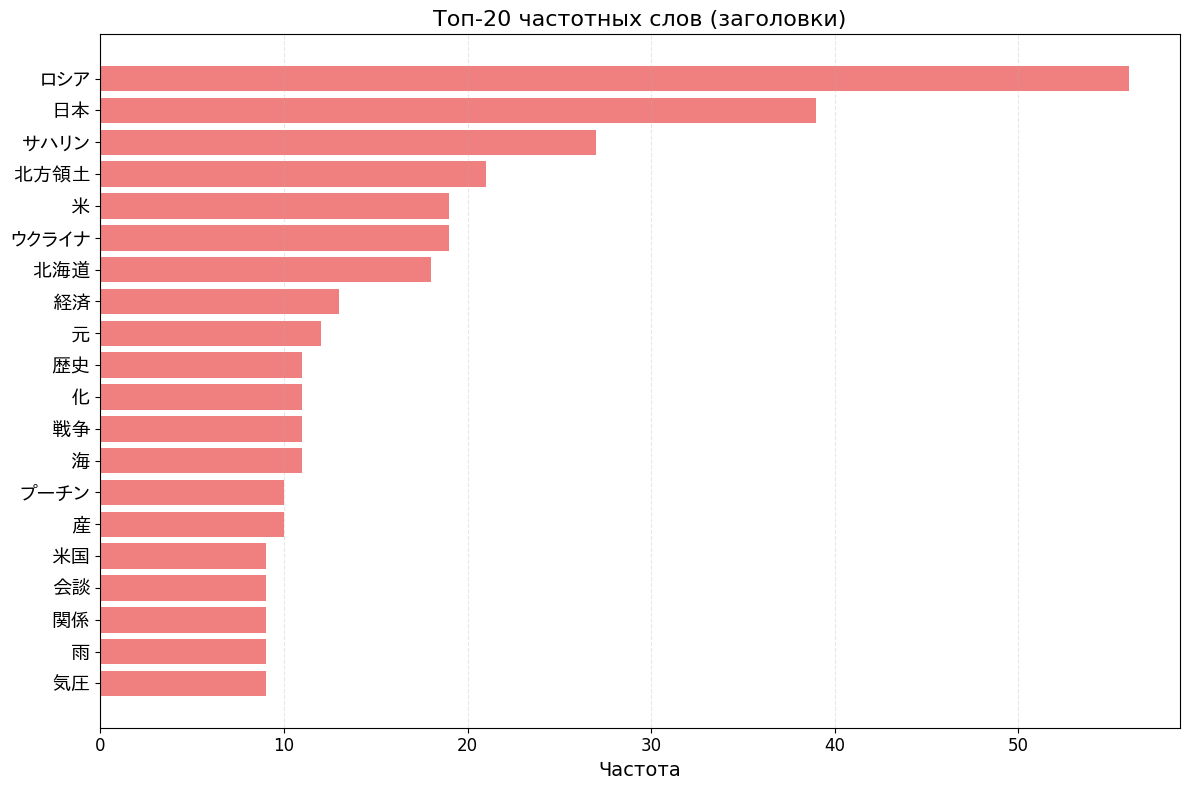

In [ ]:
# --- Построение столбчатых диаграмм ---

# Создаём объект шрифта для японских слов во избежание ошибок
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)

# --- Функция для построения горизонтальной столбчатой диаграммы топ-N слов ---
def plot_top_words(tokens_series, title="Топ слов", top_n=20, color='skyblue'):

    # Собираем все слова
    all_words = [word for sublist in tokens_series for word in sublist]
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    # Построение графика
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(words)), counts[::-1], color=color)

    # Японские слова на оси Y
    plt.yticks(range(len(words)), words[::-1], fontproperties=jp_font, fontsize=14)

    # Подписи осей на русском
    plt.xlabel("Частота", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- Примеры использования ---
plot_top_words(df['tokens_header_clean'],
               title="Топ-20 частотных слов (заголовки)",
               top_n=20,
               color='lightcoral')

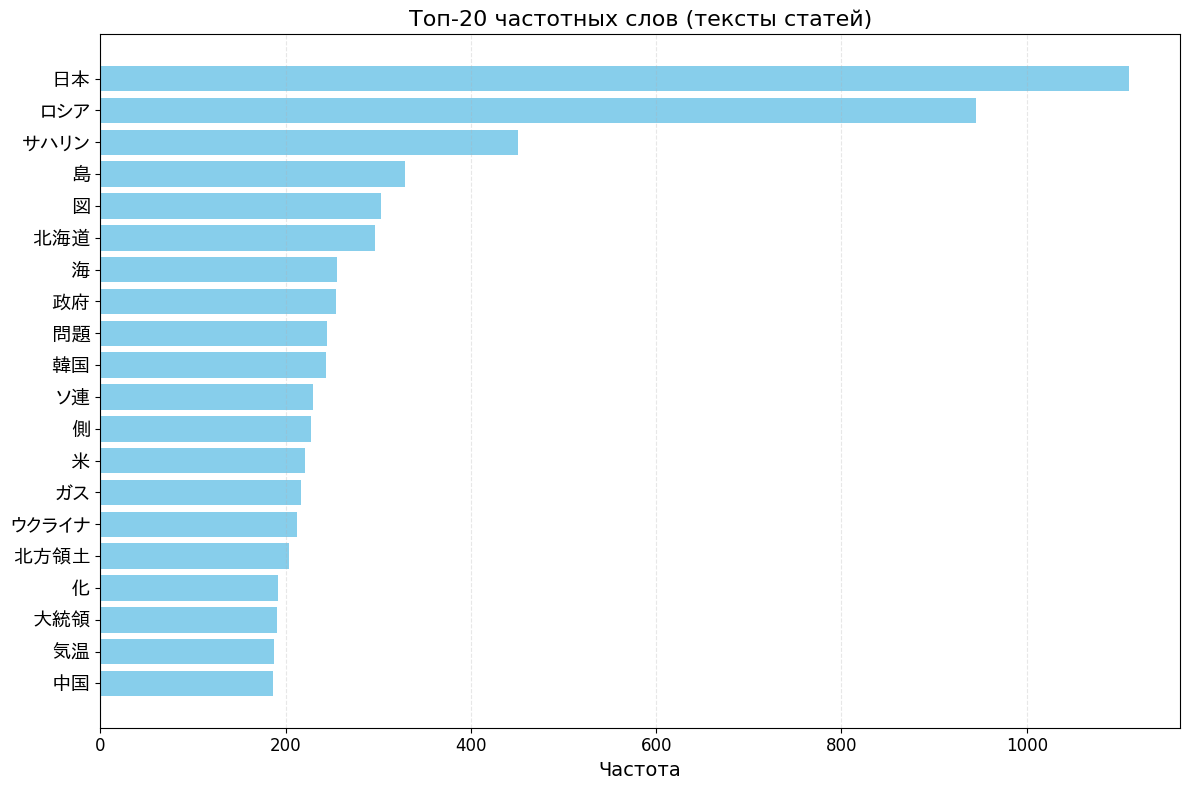

In [ ]:
plot_top_words(df['tokens_body_clean'],
               title="Топ-20 частотных слов (тексты статей)",
               top_n=20,
               color='skyblue')

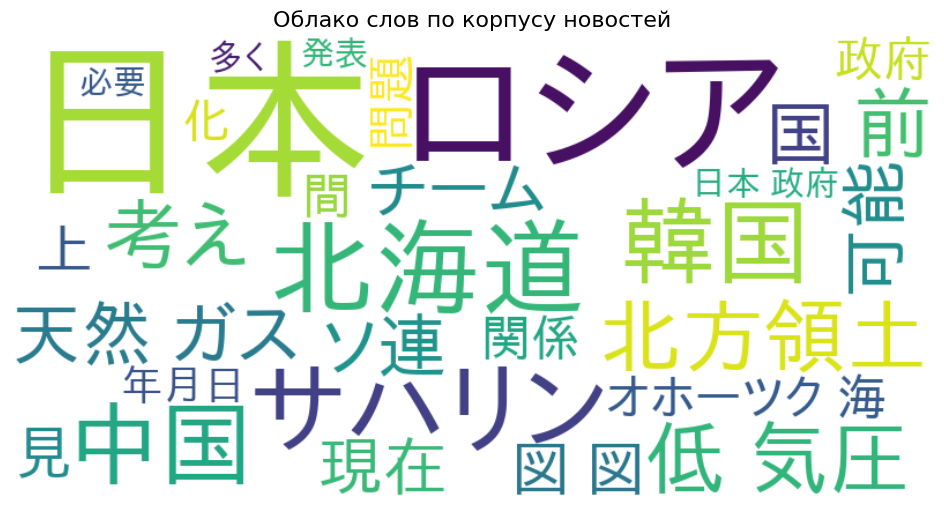

In [ ]:
# Построение облака слов по всему корпусу текстов (Заголовки + Тексты)


# --- Функция для создания облака слов из DataFrame ---
def create_wordcloud_from_df(df, columns, title="", max_words=30):

    # Объединяем все токены из всех колонок
    all_words = []
    for col in columns:
        for tokens in df[col]:
            all_words.extend(tokens)

    # Генерируем облако слов
    wc = WordCloud(
        font_path='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',
        width=800,
        height=400,
        background_color='white',
        max_words=max_words
    ).generate(" ".join(all_words))

    # Отображаем
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# --- Создаём общее облако слов для всех текстов ---
create_wordcloud_from_df(df, columns=['tokens_header_clean', 'tokens_body_clean'], title="Облако слов по корпусу новостей")


## 📚 LDA

📘 **Что такое LDA?**

LDA — это метод тематического моделирования, который помогает автоматически выявлять скрытые темы в большом наборе текстов.

Проще говоря, LDA отвечает на вопрос:

“О каких темах чаще всего пишут в нашем корпусе текстов, если мы не знаем их заранее?”

🔹 **Как это работает?**

Тексты = смешение тем. Например, одна статья про Сахалин может одновременно быть и о туризме, и о погоде, и о инфраструктуре.

Темы = смесь слов. Каждая тема описывается набором слов с различной важностью.
Например, тема «туризм» может включать слова: サハリン, 観光, 自然, 旅行, 施設.


---


👩‍🏫 Модель LDA учится сама, анализирует частоты слов в документах и пытается разложить их на темы, выявляя закономерности.

**В итоге мы получаем:**


*   список тем
*   ключевые слова




In [ ]:
# --- Тематическое моделирование LDA ---

def run_lda(tokens_series, num_topics=5, num_words=10):

    # --- 1. Создаем словарь и корпус ---
    dictionary = corpora.Dictionary(tokens_series)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_series]

    # --- 2. Обучаем модель LDA ---
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto'
    )

    # --- 3. Выводим темы без коэффициентов ---
    print(f"\n📘 Топ-{num_topics} тем по запросу 'サハリン':")
    for i in range(num_topics):
        topic_terms = lda_model.show_topic(i, topn=num_words)
        words_only = [word for word, _ in topic_terms]
        print(f"\n🎯 Тема {i+1}:")
        print(", ".join(words_only))

    return lda_model, corpus, dictionary

# --- Применение на текстах статей ---
lda_model, corpus, dictionary = run_lda(df['tokens_body_clean'], num_topics=5, num_words=10)



📘 Топ-5 тем по запросу 'サハリン':

🎯 Тема 1:
日本, 韓国, 問題, ロシア, 政府, ごみ, サハリン, 安倍, 機, 生

🎯 Тема 2:
ロシア, 日本, サハリン, ガス, ウクライナ, 石油, 天然, チーム, 円, 米

🎯 Тема 3:
アイヌ, ロシア, 日本, 軍, 北海道, 演習, 蝦夷, 民族, サハリン, 地

🎯 Тема 4:
図, 海, 気温, 気圧, 観測, 流氷, 北海道, 低, 雨, 度

🎯 Тема 5:
日本, 島, ロシア, ソ連, 北方領土, 問題, 対, 条約, プーチン, 米


## 🔗 Сеть ключевых слов (co-occurrence graph)

Этот метод помогает понять какие слова в тексте часто встречаются вместе, т.к. это явный признак того, что они связаны одной темой.


---


**Как это работает:**

*   Отбираются самые частотные слова
*   Создаем узлы графа, где каждый узел — это отдельное слово

*   Создаём связи (ребра) между словами. Если два слова встречаются вместе между ними рисуется линия. Чем чаще слова встречаются вместе, тем «толще» линия — это показывает насколько сильна связь.
*   Сам узел тем больше, чем чаще слово часто встречается в текстах.



---


Получается граф, где можно легко увидеть ключевые слова и их взаимосвязи.

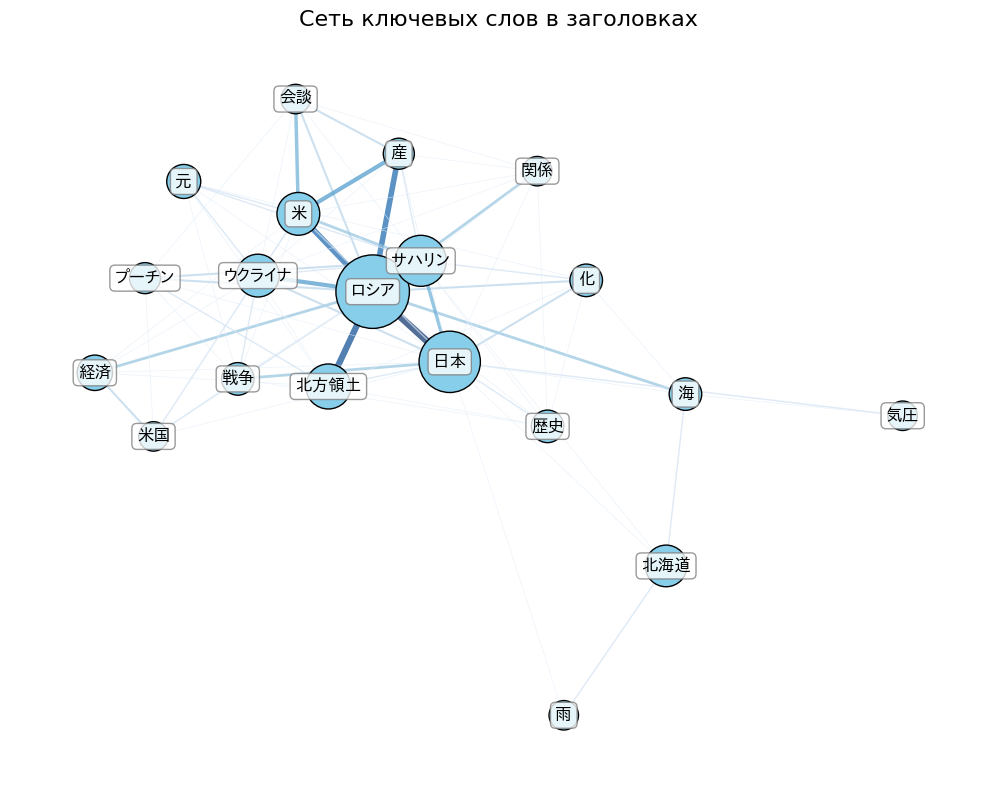

In [ ]:
# Сеть ключевых слов

# --- Шрифт для японских слов ---
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)



# --- Визуализация двух графов рядом (заголовки + тексты) ---
def plot_cooccurrence_graphs_side_by_side(df, columns=['tokens_header_clean'],
                                          titles=['Заголовки'], top_n_words=20):
    plt.figure(figsize=(20, 8))

    for i, col in enumerate(columns):
        # --- Сбор топ-слов ---
        tokens_series = df[col]
        all_words = [word for sublist in tokens_series for word in sublist]
        most_common_words = [w for w, _ in Counter(all_words).most_common(top_n_words)]

        # --- Создание графа ---
        G = nx.Graph()
        G.add_nodes_from(most_common_words)
        for doc_tokens in tokens_series:
            words_in_doc = set(doc_tokens).intersection(most_common_words)
            for w1, w2 in combinations(words_in_doc, 2):
                if G.has_edge(w1, w2):
                    G[w1][w2]['weight'] += 1
                else:
                    G.add_edge(w1, w2, weight=1)

        # --- Расположение узлов ---
        pos = nx.spring_layout(G, k=2, iterations=100, seed=42)

        # --- Настройка размеров узлов по частоте ---
        freq = Counter([w for sublist in tokens_series for w in sublist])
        node_sizes = [freq[n]*50 for n in G.nodes()]

        # --- Толщина и цвет рёбер ---
        weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
        max_w = max(weights) if weights else 1
        widths = [w/max_w*5 for w in weights]
        colors = [plt.cm.Blues(w/max_w) for w in weights]

        # --- Рисуем узлы и рёбра ---
        plt.subplot(1, 2, i+1)
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                               node_color='skyblue' if col=='tokens_header_clean' else 'skyblue',
                               edgecolors='black')
        nx.draw_networkx_edges(G, pos, width=widths, edge_color=colors, alpha=0.7)

        # --- Подписи ---
        for node, (x, y) in pos.items():
            plt.text(
                x, y, node,
                fontproperties=jp_font,
                ha='center', va='center',
                fontsize=12,
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.3')
            )

        plt.title(titles[i], fontsize=16)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- Использование ---
plot_cooccurrence_graphs_side_by_side(df,
                                      columns=['tokens_header_clean'],
                                      titles=['Сеть ключевых слов в заголовках'],
                                      top_n_words=20)


### 🪅 Интерактивные графы

Этот же граф с помощью Python можно сделать интерактивным!
Возможно использовать в презентации его не особо получится, но для того, чтобы самому разобраться и лучше изучить существующие связи очень даже полезно.

Узлы можно двигать мышкой, чтобы лучше рассмотреть структуру.А также при наведении или клике на слово подсвечиваются его связи с другими словами.



In [ ]:
def build_interactive_cooccurrence(df, column='tokens_header_clean', top_n_words=20, output_file="cooccurrence_header.html"):
    tokens_series = df[column]

    # --- Топ слов ---
    all_words = [word for sublist in tokens_series for word in sublist]
    freq = Counter(all_words)
    most_common_words = [w for w, _ in freq.most_common(top_n_words)]

    # --- Создаем граф ---
    net = Network(height='800px', width='100%', bgcolor='white', font_color='black', notebook=False)

    # --- Добавляем узлы ---
    max_freq = max(freq[w] for w in most_common_words)
    for word in most_common_words:
        node_size = np.log1p(freq[word]) * 10  # логарифм + уменьшенный множитель
        # цвет узла по частоте (градиент от бледно-голубого до темно-синего)
        color_intensity = freq[word] / max_freq
        color = cm.Blues(color_intensity)
        net.add_node(word,
                     label=word,
                     size=node_size,
                     color='rgb({}, {}, {})'.format(int(color[0]*255), int(color[1]*255), int(color[2]*255)))


    # --- Добавляем ребра ---
    edge_weights = {}
    for doc_tokens in tokens_series:
        words_in_doc = set(doc_tokens).intersection(most_common_words)
        for w1, w2 in combinations(words_in_doc, 2):
            key = tuple(sorted([w1, w2]))
            edge_weights[key] = edge_weights.get(key, 0) + 1

    max_weight = max(edge_weights.values()) if edge_weights else 1
    for (w1, w2), weight in edge_weights.items():
        # толщина и прозрачность ребра по весу
        width = weight / max_weight * 5
        opacity = min(weight / max_weight + 0.2, 1.0)  # немного прозрачности для слабых связей
        net.add_edge(w1, w2, value=weight, color='rgba(0,0,150,{})'.format(opacity), width=width)

    # --- Сохраняем интерактивный граф ---
    net.show_buttons(filter_=['physics'])  # добавляем кнопки управления физикой узлов
    net.save_graph(output_file)
    print(f"✅ Граф сохранён в файл {output_file}. Сохраните его и откройте в браузере.")

# --- Применение ---
build_interactive_cooccurrence(df, column='tokens_header_clean', top_n_words=20)


✅ Граф сохранён в файл cooccurrence_header.html. Сохраните его и откройте в браузере.


# Ключевое слово - 樺太

In [ ]:
# СБОР ССЫЛОК


# Внешние файлы, необходимые для страниц, которые показываются только по кнопке "もっと見る"

file_ids_karafuto = {
    "karafuto_json1.json": "1xkeguV9Rrdz5EbjuKhdTpI-ujcHTibhs",
    "karafuto_json2.json": "1gMGmvan-ph4MY6sTnGZhLs4IgVBcs7qd",
    "karafuto_json3.json": "1WSetpHhYetGBK9-_dw1bqb3MkjlY6NUM"
}

# Скачиваем файлы, если их нет
for name, fid in file_ids_karafuto.items():
    if not os.path.exists(name):
        print(f"⬇️ Скачиваю {name} ...")
        gdown.download(f"https://drive.google.com/uc?id={fid}", name, quiet=False)
print("Все JSON-файлы загружены\n")

# --- 1. Получаем HTML со страницы поиска ---
url_karafuto = "https://news.yahoo.co.jp/search?p=樺太&ei=utf-8"
response = requests.get(url_karafuto)
soup = BeautifulSoup(response.text, "html.parser")

# --- 2. Извлекаем ссылки из HTML ---
data_karafuto = soup.find_all("li", class_="sc-1u4589e-0 kKmBYF")
links = []

for item in data_karafuto:
    a_tag = item.find("a", href=True)
    if a_tag:
        links.append(a_tag["href"])

# --- 3. Подгружаем ссылки из JSON файлов ---
for file_name in file_ids_karafuto.keys():
    with open(file_name, "r", encoding="utf-8") as f:
        file = json.load(f)
        for entry in file["contents"]:
            links.append(entry["permalink"])

# --- 4. Сохраняем все ссылки в txt ---
with open("karafuto_links.txt", "w", encoding="utf-8") as f:
    for link in links:
        f.write(link + "\n")

print(f"✅ Всего сохранено ссылок: {len(links)}")


⬇️ Скачиваю karafuto_json1.json ...


Downloading...
From: https://drive.google.com/uc?id=1xkeguV9Rrdz5EbjuKhdTpI-ujcHTibhs
To: /content/karafuto_json1.json
100%|██████████| 70.3k/70.3k [00:00<00:00, 19.0MB/s]


⬇️ Скачиваю karafuto_json2.json ...


Downloading...
From: https://drive.google.com/uc?id=1gMGmvan-ph4MY6sTnGZhLs4IgVBcs7qd
To: /content/karafuto_json2.json
100%|██████████| 69.4k/69.4k [00:00<00:00, 24.5MB/s]


⬇️ Скачиваю karafuto_json3.json ...


Downloading...
From: https://drive.google.com/uc?id=1WSetpHhYetGBK9-_dw1bqb3MkjlY6NUM
To: /content/karafuto_json3.json
100%|██████████| 23.4k/23.4k [00:00<00:00, 18.9MB/s]


Все JSON-файлы загружены

✅ Всего сохранено ссылок: 168


In [ ]:
# СБОР ДАННЫХ

CURRENT_YEAR = 2025  # год по умолчанию, если в дате нет года


# --- Функции ---

def legalize(s):

    forbidden = ['*', '/', ':', '<', '>', '?', '+', '|', '"', '\\']
    for ch in forbidden:
        s = s.replace(ch, '')
    return s.strip()


def format_date(s):
    if not s:
        return "Неизвестно"

    date_part = s.split("(")[0].split()[0]  # оставляем только '2012/9/23' или '11/2'

    parts = date_part.split("/")
    if len(parts) == 3:
        year, month, day = parts
    elif len(parts) == 2:
        month, day = parts
        year = str(CURRENT_YEAR)
    else:
        return s

    try:
        dt = datetime(int(year), int(month), int(day))
        return dt.strftime("%d.%m.%Y")
    except ValueError:
        return s


# --- Загружаем ссылки ---
with open('karafuto_links.txt', 'r', encoding='utf-8') as file:
    articles = [line.strip() for line in file if line.strip()]

# --- Подготовка DataFrame ---
df = pd.DataFrame(columns=['time', 'header', 'body', 'url'])

# --- Основной цикл по ссылкам ---
for idx, url in enumerate(articles, start=1):
    print(f"[{idx}/{len(articles)}] Обработка: {url}")
    try:
        r = requests.get(url, timeout=10)
        if r.status_code != 200:
            print(f"⚠️ Ошибка {r.status_code} при загрузке {url}")
            continue

        soup = BeautifulSoup(r.text, "html.parser")

        # --- Дата ---
        time_tag = soup.find('time')
        date = format_date(time_tag.text if time_tag else None)

        # --- Заголовок (дополнительные варианты) ---
        header_tag = (
            soup.find('h1', class_='sc-uzx6gd-1 lljVgU') or
            soup.find('h1', class_='sc-1fea4ol-1 lnFmzl') or
            soup.find('h1', class_='sc-yl661w-1 kMFRwF')
        )
        header = legalize(header_tag.get_text(strip=True)) if header_tag else "Без заголовка"

        # --- Тело статьи (дополнительные варианты) ---
        body_tag = (
            soup.find('div', class_='article_body highLightSearchTarget') or
            soup.find('div', attrs={'data-ual-view-type': 'detail'}) or
            soup.find('div', class_='sc-11ia9sn-1 bNDkYi')
        )
        body = body_tag.get_text(separator="\n", strip=True) if body_tag else ""

        # --- Сохраняем в DataFrame ---
        df.loc[len(df)] = [date, header, body, url]

        sleep(0.5)  # пауза, чтобы не забанили

    except Exception as e:
        print(f"⚠️ Ошибка при обработке {url}: {e}")
        continue


# --- Статистика по отсутствующим заголовкам ---
missing_count = (df["header"] == "Без заголовка").sum()
print(f"\n🔍 Найдено статей без заголовка: {missing_count}")

# --- Удаляем строки без заголовка ---
df = df[df["header"] != "Без заголовка"].reset_index(drop=True)

print(f"✅ После очистки осталось статей: {len(df)}")

# --- Сохраняем в Excel ---
output_file = 'karafuto_articles.xlsx'
df.to_excel(output_file, index=False)
print(f"\n📁 Готово! Файл сохранён как '{output_file}'")


[1/168] Обработка: https://news.yahoo.co.jp/articles/f67adb01b21633589d749b1c27922e9c7b1f59bc
[2/168] Обработка: https://news.yahoo.co.jp/articles/3f9d6865c1b00b22e4b321b83e515185a96c51b1
[3/168] Обработка: https://news.yahoo.co.jp/articles/f68ae6f66455bb8c2b5c607cc9b4b7edeab74d08
[4/168] Обработка: https://news.yahoo.co.jp/articles/1ed054d356305d30850208eb8bd78ce1bdbc8eab
[5/168] Обработка: https://news.yahoo.co.jp/articles/71f711b3439fe3e54c91871ff0eea398b1f18d8e
[6/168] Обработка: https://news.yahoo.co.jp/articles/a821f132c6fe58437c3f315450ca15a80a14f531
[7/168] Обработка: https://news.yahoo.co.jp/articles/ef1b3c7ac9aeaac94e5809154cacc2769f66dcf7
[8/168] Обработка: https://news.yahoo.co.jp/articles/07eea0400fc53a7409f2707b9fb9d5d657bfbbf9
[9/168] Обработка: https://news.yahoo.co.jp/articles/2d6cd5faad9e64a22b3621c6b282a942d7a8f2c5
[10/168] Обработка: https://news.yahoo.co.jp/articles/6e57c05af7e9962a1d3c8ddf55c5a0c2d8abbee3
[11/168] Обработка: https://news.yahoo.co.jp/articles/f5b46

In [ ]:
# ТОКЕНИЗАЦИЯ

# --- Загружаем Excel с текстами статьей ---
df_karafuto = pd.read_excel('karafuto_articles.xlsx')

tokenizer = Tokenizer()

# --- Загружаем список японских стоп-слов ---
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.json"
stop_words = set(json.loads(requests.get(url).text))

# --- Дополнительные японские стоп-слова ---
additional_stop_words = {
    'する', 'いる', 'なる', 'ある', 'こと', 'もの', 'これ', 'それ', 'あれ', 'どれ',
    'ない', 'できる', 'よう', 'さん', '的', 'てる', 'れる', 'られる', 'せる', 'させる', 'だから'
}
stop_words.update(additional_stop_words)

# --- Функция очистки текста ---
def clean_text(text):
    if pd.isna(text):
        return ""

    text = str(text)
    # 1️⃣ Убираем переносы строк и табы
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # 2️⃣ Убираем цифры (арабские и японские)
    text = re.sub(r'[0-9０-９]', '', text)

    # 3️⃣ Убираем знаки препинания
    text = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@[\\]^_`{|}~！？。、．，：「」『』（）［］｛｝〈〉《》【】・〜‥…‧：；—―･]％', '', text)

    # 4️⃣ Убираем неразрывные и двойные пробелы
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('\u3000', ' ')  # японский пробел

    # 5️⃣ Убираем случайные ведущие/замыкающие пробелы
    text = text.strip()

    return text


# --- Функция токенизации ---
def strict_tokenize(text):
    text = clean_text(text)
    if not text:
        return []

    tokens = []
    for token in tokenizer.tokenize(text):
        surface = token.surface.strip()

        if not surface:
            continue

        if surface in stop_words:
            continue

        pos = token.part_of_speech or ""

        if any(marker in pos for marker in ['記号', '補助記号', '空白', 'フィラー', '間投']):
            continue

        if re.fullmatch(r'[\W_]+', surface):
            continue

        if len(surface) <= 2:
            if not any(marker in pos for marker in ['名詞', '形容詞', '動詞', '副詞']):
                continue


        tokens.append(surface)

    return tokens


# --- Применяем токенизацию ---
print("🔧 Применяем токенизацию...")
df_karafuto['tokens_header'] = df_karafuto['header'].apply(strict_tokenize)
df_karafuto['tokens_body'] = df_karafuto['body'].apply(strict_tokenize)

# --- Результат ---
print("✅ Токенизация завершена!")
print("\n📊 Результаты:")
print(df_karafuto[['header', 'tokens_header', 'body', 'tokens_body']].head())


🔧 Применяем токенизацию...
✅ Токенизация завершена!

📊 Результаты:
                                              header  \
0          もし日本が戦勝国になっていたら、アメリカのように繁栄できたのか？→専門家の答えとは   
1                   戦死した卒業生を調査　母校など9校570人判明、歴史愛好家が本に   
2  ＜八木亜希子＞「ちょっと幻想的」　日本画「花嫁」の涙に込めた画家・蕗谷虹児の思いとは？　「新...   
3                   千島列島・元島民の日誌発見　旧ソ連に没収されず「ほぼ唯一の記録」   
4          未来の保証がない奨励会時代、星新一さんの短編に助けられた……将棋棋士の杉本昌隆さん   

                                       tokens_header  \
0           [もし, 日本, 戦勝, 国, たら, アメリカ, 繁栄, 専門, 家, 答え]   
1          [戦死, 卒業生, 調査, 母校, 校, 人, 判明, 歴史, 愛好, 家, 本]   
2  [八木, 亜希子, ちょっと, 幻想, 日本, 画, 花嫁, 涙, 込め, 画家, 蕗, 谷...   
3     [千島, 列島, 元, 島民, 日誌, 発見, 旧, ソ連, 没収, ほぼ, 唯一, 記録]   
4  [未来, 保証, 奨励, 会, 時代, 星, 新一, 短編, 助け, 将棋, 棋士, 杉本,...   

                                                body  \
0  原爆ドーム　Photo:PIXTA\nもし日本が第二次世界大戦で戦勝国になっていたら、アメリ...   
1  北海道内の大学卒業生の戦死者を調べた島津彰さん\n太平洋戦争で戦死した北海道内の大学や師範学...   
2  11月8日放送の「新美の巨人たち」に出演する八木亜希子さん＝テレビ東京提供\nフリーアナウン...   
3  父の別所二郎蔵さんが樺太の収容所で書いた日誌を掲げる三男の三夫さ

In [ ]:
# --- Удаление дополнительных стоп-слов ---



# В этот раз попробуем самостоятельно составить список стоп-слов

# Список слов, которые по результатам анализа оказались частыми, но неинформативными
useless_words = {'日', '年', 'まし', '人', '月日', '者', '後', '中', '年月日', 'でし', '年月',  '多い',  '多く', '一', 'ませ', '時', 'そう', 'たい'


}

# --- Функция для удаления этих слов ---
def remove_useless_words(tokens):

    return [t for t in tokens if t not in useless_words]

# --- Применяем фильтрацию и создаем новые столбцы ---

df_karafuto['tokens_header_clean'] = df_karafuto['tokens_header'].apply(remove_useless_words)
df_karafuto['tokens_body_clean'] = df_karafuto['tokens_body'].apply(remove_useless_words)
print("🧹 Очистка токенов завершена")



🧹 Очистка токенов завершена


In [ ]:


# --- Функция для таблицы частотности ---
def get_word_frequency_table(tokens_series, top_n=20):
    all_tokens = [token for sublist in tokens_series for token in sublist]
    freq = Counter(all_tokens).most_common(top_n)
    freq_df = pd.DataFrame(freq, columns=['Слово', 'Частота'])

    # Добавляем нумерацию, начиная с 1
    freq_df.index = range(1, len(freq_df) + 1)
    freq_df.index.name = '№'

    return freq_df


# --- Частотность для заголовков ---
print("✅ Топ-20 частотных слов в заголовках:")
header_freq_df = get_word_frequency_table(df_karafuto['tokens_header_clean'], top_n=20)
display(header_freq_df)


✅ Топ-20 частотных слов в заголовках:


,Слово,Частота
№,,
1,北方領土,26
2,日本,24
3,戦争,16
4,島民,14
5,北海道,14
6,島,14
7,元,13
8,樺太,12
9,戦後,12


In [ ]:
# --- Частотность для текстов статей ---
print("✅ Топ-30 частотных слов в теле статей:")
body_freq_df = get_word_frequency_table(df_karafuto['tokens_body_clean'], top_n=30)
display(body_freq_df)

✅ Топ-30 частотных слов в теле статей:


,Слово,Частота
№,,
1,日本,888
2,ソ連,404
3,島,396
4,樺太,311
5,アイヌ,269
6,戦争,258
7,北海道,255
8,アメリカ,245
9,ロシア,242


In [ ]:
# --- Функция для поиска контекста слова ---

def show_word_context(df, column='body', word='', window=5, as_tokens=False, highlight=True):

    results = []
    HIGHLIGHT_START = '\033[91m'  # Красный цвет
    HIGHLIGHT_END = '\033[0m'     # Сброс цвета

    for i, text in enumerate(df[column]):

            sentences = re.split(r'[。.!?\n]', str(text))
            for sent in sentences:
                if word in sent:
                    context = sent.strip()
                    if highlight:
                        context = context.replace(word, f"{HIGHLIGHT_START}{word}{HIGHLIGHT_END}")
                    results.append(context)
    return results

# ---  Пример использования ---

# Искомое слово
word_to_find = '旧'

# Контекст - предложение
contexts_sentences = show_word_context(df_karafuto, column='body', word=word_to_find, as_tokens=False)
print(f"📖 Контекст слова '{word_to_find}' в корпусе текстов:")

print("---")

for idx, context in enumerate(contexts_sentences[:30], 1):
    print(f"{idx}) {context}")
print("---")

📖 Контекст слова '旧' в корпусе текстов:
---
1) 今世紀に入り、ヨーロッパの旧植民地帝国もようやく、その歴史的責任を問われる時代を迎えつつある
2) 千島列島最北端の占守（しゅむしゅ）島で暮らし、終戦後の1947年に旧ソ連の樺太（からふと）・真岡（まおか）（現ロシア・ホルムスク）経由で引き揚げてきた日本人男性が書いた日誌が今夏、北海道根室市で見つかった
3) 占守島は樺太千島交換条約（1875年）によって日本の領土となったが、旧ソ連軍は終戦後に占守島に侵攻
4) 【モスクワ共同】ロシア極東サハリン州南部コルサコフ（旧大泊）のクプリナ市長は16日、日本が統治した「樺太時代」に設置された記念碑が何者かによって夜間に掘削機で撤去されたと通信アプリに投稿した
5) 地元メディアによると撤去されたのは、コルサコフ市内のオホーツコエ村（旧富内）にかつてあった富内稲荷神社の跡地の「忠魂碑」
6) バックアップで用意されていたマイクロ波による台湾本島との通信で最低限の連絡をとることはできたが、海底ケーブルの欠落をカバーできるほどの帯域はなく、ケーブルの復旧を待つほかなかった
7) 終戦直後、南樺太（現ロシア・サハリン南部）からの引き揚げ船3隻が、北海道・留萌沖で旧ソ連軍とみられる潜水艦に攻撃され、約1700人が死亡・行方不明となった「三船遭難事件」を巡り、留萌市の港湾建設会社が沈んだ小笠原丸とみられる船の動画撮影に成功した
8) 終戦直前の1945年8月11日、当時日本領だった樺太（サハリン）は、日ソ中立条約を一方的に破棄した旧ソ連軍に侵攻された
9) 樺太と北海道を隔てる宗谷海峡を渡る船はなく、旧ソ連に占領された樺太に残留せざるを得なかった
10) 旧ソ連軍の侵攻で豊原は空襲を受けた
11) 少女は自宅2階に同居していた旧ソ連軍医夫妻の娘
12) 決して暗い影ばかりではなかった旧ソ連兵たちと家族との交流は、現代のロシアのウクライナ侵攻について、国と国だけではない異なる見方をもたらしている
13) 終戦直後、南樺太（現サハリン）からの引き揚げ船3隻が、北海道・留萌沖で旧ソ連軍とみられる潜水艦に攻撃され、約1700人が死亡・行方不明となった「三船遭難事件」を巡り、市民らが16日、留萌市の海岸で犠牲者を悼み、送り火を行った
14) そのほか、

In [ ]:
# готовый список слов для Karafuto
# '日', '年', 'まし', '人', '月日', '者', '後', '中', '年月日', 'でし', '年月',  '多い',  '多く', '一', 'ませ', '時', 'そう', 'たい', 'たら', 'やっ'


In [ ]:
# --- Построение столбчатых диаграмм ---

# Создаём объект шрифта для японских слов во избежание ошибок
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)

# --- Функция для построения горизонтальной столбчатой диаграммы топ-N слов ---
def plot_top_words(tokens_series, title="Топ слов", top_n=20, color='skyblue'):

    # Собираем все слова
    all_words = [word for sublist in tokens_series for word in sublist]
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    # Построение графика
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(words)), counts[::-1], color=color)

    # Японские слова на оси Y
    plt.yticks(range(len(words)), words[::-1], fontproperties=jp_font, fontsize=14)

    # Подписи осей на русском
    plt.xlabel("Частота", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- Примеры использования ---
plot_top_words(df_karafuto['tokens_header_clean'],
               title="Топ-20 частотных слов (заголовки)",
               top_n=20,
               color='lightcoral')

In [ ]:
plot_top_words(df_karafuto['tokens_body_clean'],
               title="Топ-20 частотных слов (тексты статей)",
               top_n=20,
               color='skyblue')

In [ ]:
# Построение облака слов по всему корпусу текстов (Заголовки + Тексты)


# --- Функция для создания облака слов из DataFrame ---
def create_wordcloud_from_df(df, columns, title="", max_words=30):

    # Объединяем все токены из всех колонок
    all_words = []
    for col in columns:
        for tokens in df[col]:
            all_words.extend(tokens)

    # Генерируем облако слов
    wc = WordCloud(
        font_path='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',
        width=800,
        height=400,
        background_color='white',
        max_words=max_words
    ).generate(" ".join(all_words))

    # Отображаем
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# --- Создаём общее облако слов для всех текстов ---
create_wordcloud_from_df(df_karafuto, columns=['tokens_header_clean', 'tokens_body_clean'], title="Облако слов по корпусу новостей")


In [ ]:
# --- Тематическое моделирование LDA ---

def run_lda(tokens_series, num_topics=5, num_words=10):

    # --- 1. Создаем словарь и корпус ---
    dictionary = corpora.Dictionary(tokens_series)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_series]

    # --- 2. Обучаем модель LDA ---
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto'
    )

    # --- 3. Выводим темы без коэффициентов ---
    print(f"\n📘 Топ-{num_topics} тем по запросу '樺太' (Karafuto):")
    for i in range(num_topics):
        topic_terms = lda_model.show_topic(i, topn=num_words)
        words_only = [word for word, _ in topic_terms]
        print(f"\n🎯 Тема {i+1}:")
        print(", ".join(words_only))

    return lda_model, corpus, dictionary

# --- Применение на текстах статей ---
lda_model, corpus, dictionary = run_lda(df_karafuto['tokens_body_clean'], num_topics=5, num_words=10)


In [ ]:
# Сеть ключевых слов

# --- Шрифт для японских слов ---
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)



# --- Визуализация двух графов рядом (заголовки + тексты) ---
def plot_cooccurrence_graphs_side_by_side(df_karafuto, columns=['tokens_header_clean'],
                                          titles=['Заголовки'], top_n_words=20):
    plt.figure(figsize=(20, 8))

    for i, col in enumerate(columns):
        # --- Сбор топ-слов ---
        tokens_series = df_karafuto[col]
        all_words = [word for sublist in tokens_series for word in sublist]
        most_common_words = [w for w, _ in Counter(all_words).most_common(top_n_words)]

        # --- Создание графа ---
        G = nx.Graph()
        G.add_nodes_from(most_common_words)
        for doc_tokens in tokens_series:
            words_in_doc = set(doc_tokens).intersection(most_common_words)
            for w1, w2 in combinations(words_in_doc, 2):
                if G.has_edge(w1, w2):
                    G[w1][w2]['weight'] += 1
                else:
                    G.add_edge(w1, w2, weight=1)

        # --- Расположение узлов ---
        pos = nx.spring_layout(G, k=2, iterations=100, seed=42)

        # --- Настройка размеров узлов по частоте ---
        freq = Counter([w for sublist in tokens_series for w in sublist])
        node_sizes = [freq[n]*50 for n in G.nodes()]

        # --- Толщина и цвет рёбер ---
        weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
        max_w = max(weights) if weights else 1
        widths = [w/max_w*5 for w in weights]
        colors = [plt.cm.Blues(w/max_w) for w in weights]

        # --- Рисуем узлы и рёбра ---
        plt.subplot(1, 2, i+1)
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                               node_color='skyblue' if col=='tokens_header_clean' else 'skyblue',
                               edgecolors='black')
        nx.draw_networkx_edges(G, pos, width=widths, edge_color=colors, alpha=0.7)

        # --- Подписи ---
        for node, (x, y) in pos.items():
            plt.text(
                x, y, node,
                fontproperties=jp_font,
                ha='center', va='center',
                fontsize=12,
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.3')
            )

        plt.title(titles[i], fontsize=16)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- Использование ---
plot_cooccurrence_graphs_side_by_side(df_karafuto,
                                      columns=['tokens_header_clean'],
                                      titles=['Сеть ключевых слов в заголовках'],
                                      top_n_words=20)


# Туризм

In [ ]:
# СБОР ССЫЛОК

urls = [
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue",
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue&page=2",
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue&page=3",
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue&page=4",
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue&page=5",
    "https://4travel.jp/os_travelogue_list-city-yuzhno_sakhalinsk.html?lid=area_travelogue_top_from_travelogue&page=6",
]

links = []

for i, url in enumerate(urls, 1):
    print(f"Парсим страницу {i}...")
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for a in soup.find_all("a", class_="titleItem"):
        href = a.get("href")
        if href:
            if not href.startswith("http"):
                href = "https://4travel.jp" + href
            links.append(href)

    sleep(1)

# Сохраняем ссылки в txt
with open("travel_links.txt", "w", encoding="utf-8") as f:
    for link in links:
        f.write(link + "\n")

print(f"✅ Готово! Всего собрано {len(links)} ссылок.")


Парсим страницу 1...
Парсим страницу 2...
Парсим страницу 3...
Парсим страницу 4...
Парсим страницу 5...
Парсим страницу 6...
✅ Готово! Всего собрано 154 ссылок.


In [ ]:
# СБОР ДАННЫХ

# --- Функции ---
def legalize(s):
    """Очистка заголовка от запрещённых символов для файлов"""
    forbidden = ['*', '/', ':', '<', '>', '?', '+', '|', '"', '\\']
    for ch in forbidden:
        s = s.replace(ch, '')
    return s.strip()


def format_date(s):

    if not s:
        return "Неизвестно"
    # Вырезаем первую подходящую дату вида YYYY/MM/DD
    m = re.search(r'(\d{4})/(\d{1,2})/(\d{1,2})', s)
    if not m:
        # иногда даты могут быть в виде YYYY年M月D日
        m2 = re.search(r'(\d{4})年\s*(\d{1,2})月\s*(\d{1,2})日', s)
        if not m2:
            return s
        year, month, day = m2.groups()
    else:
        year, month, day = m.groups()

    try:
        dt = datetime(int(year), int(month), int(day))
        return dt.strftime("%d.%m.%Y")
    except ValueError:
        return s


# --- Загружаем ссылки ---
with open('travel_links.txt', 'r', encoding='utf-8') as file:
    articles = [line.strip() for line in file if line.strip()]

# --- Подготовка DataFrame ---
df = pd.DataFrame(columns=['time', 'header', 'body', 'url'])

# --- Основной цикл по ссылкам ---
for idx, url in enumerate(articles, start=1):
    print(f"[{idx}/{len(articles)}] Обработка: {url}")
    try:
        r = requests.get(url, timeout=10)
        if r.status_code != 200:
            print(f"⚠️ Ошибка {r.status_code} при загрузке {url}")
            continue

        soup = BeautifulSoup(r.text, "html.parser")

        # --- Дата ---
        time_tag = soup.find('p', class_='day')
        date = format_date(time_tag.get_text(strip=True) if time_tag else None)

        # --- Заголовок ---
        header_tag = soup.find('h1', class_='headingText')
        header = legalize(header_tag.get_text(strip=True)) if header_tag else "Без заголовка"

        # --- Основной текст ---
        outline = soup.find('p', class_='outlineTextBlock')
        description = soup.find('p', class_='contentsDescription')
        outline_text = outline.get_text(strip=True) if outline else ""
        description_text = description.get_text(strip=True) if description else ""
        body = (outline_text + "\n" + description_text).strip()

        # --- Сохраняем в DataFrame (яявный словарь, чтобы избежать сдвигов) ---
        row = {'time': date, 'header': header, 'body': body, 'url': url}
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

        sleep(0.5)

    except Exception as e:
        print(f"⚠️ Ошибка при обработке {url}: {e}")
        continue

# --- Статистика ---
missing_count = (df["header"] == "Без заголовка").sum()
print(f"\n🔍 Найдено статей без заголовка: {missing_count}")

df = df[df["header"] != "Без заголовка"].reset_index(drop=True)
print(f"✅ После очистки осталось статей: {len(df)}")

# --- Сохраняем в Excel ---
output_file = 'travel_articles.xlsx'
df.to_excel(output_file, index=False)
print(f"\n📁 Готово! Файл сохранён как '{output_file}'")


[1/154] Обработка: https://4travel.jp/travelogue/11546337
[2/154] Обработка: https://4travel.jp/travelogue/11546149
[3/154] Обработка: https://4travel.jp/travelogue/11546052
[4/154] Обработка: https://4travel.jp/travelogue/11544579
[5/154] Обработка: https://4travel.jp/travelogue/11544465
[6/154] Обработка: https://4travel.jp/travelogue/11543248
[7/154] Обработка: https://4travel.jp/travelogue/11543243
[8/154] Обработка: https://4travel.jp/travelogue/11543234
[9/154] Обработка: https://4travel.jp/travelogue/11518762
[10/154] Обработка: https://4travel.jp/travelogue/11531896
[11/154] Обработка: https://4travel.jp/travelogue/11531967
[12/154] Обработка: https://4travel.jp/travelogue/11532665
[13/154] Обработка: https://4travel.jp/travelogue/11532955
[14/154] Обработка: https://4travel.jp/travelogue/11527434
[15/154] Обработка: https://4travel.jp/travelogue/11526043
[16/154] Обработка: https://4travel.jp/travelogue/11711560
[17/154] Обработка: https://4travel.jp/travelogue/11524238
[18/15

In [ ]:
# ТОКЕНИЗАЦИЯ

# --- Загружаем Excel с текстами статьей ---
df_travel = pd.read_excel('travel_articles.xlsx')

tokenizer = Tokenizer()

# --- Загружаем список японских стоп-слов ---
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ja/master/stopwords-ja.json"
stop_words = set(json.loads(requests.get(url).text))

# --- Дополнительные японские стоп-слова ---
additional_stop_words = {
    'する', 'いる', 'なる', 'ある', 'こと', 'もの', 'これ', 'それ', 'あれ', 'どれ',
    'ない', 'できる', 'よう', 'さん', '的', 'てる', 'れる', 'られる', 'せる', 'させる', 'だから'
}
stop_words.update(additional_stop_words)

# --- Функция очистки текста ---
def clean_text(text):
    if pd.isna(text):
        return ""

    text = str(text)
    # 1️⃣ Убираем переносы строк и табы
    text = text.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ')

    # 2️⃣ Убираем цифры (арабские и японские)
    text = re.sub(r'[0-9０-９]', '', text)

    # 3️⃣ Убираем знаки препинания
    text = re.sub(r'[!"#$%&\'()*+,\-./:;<=>?@[\\]^_`{|}~！？。、．，：「」『』（）［］｛｝〈〉《》【】・〜‥…‧：；—―･]％', '', text)

    # 4️⃣ Убираем неразрывные и двойные пробелы
    text = re.sub(r'\s+', ' ', text)
    text = text.replace('\u3000', ' ')  # японский пробел

    # 5️⃣ Убираем случайные ведущие/замыкающие пробелы
    text = text.strip()

    return text


# --- Функция токенизации ---
def strict_tokenize(text):
    text = clean_text(text)
    if not text:
        return []

    tokens = []
    for token in tokenizer.tokenize(text):
        surface = token.surface.strip()

        if not surface:
            continue

        if surface in stop_words:
            continue

        pos = token.part_of_speech or ""

        if any(marker in pos for marker in ['記号', '補助記号', '空白', 'フィラー', '間投']):
            continue

        if re.fullmatch(r'[\W_]+', surface):
            continue

        if len(surface) <= 2:
            if not any(marker in pos for marker in ['名詞', '形容詞', '動詞', '副詞']):
                continue


        tokens.append(surface)

    return tokens


# --- Применяем токенизацию ---
print("🔧 Применяем токенизацию...")
df_travel['tokens_header'] = df_travel['header'].apply(strict_tokenize)
df_travel['tokens_body'] = df_travel['body'].apply(strict_tokenize)

# --- Результат ---
print("✅ Токенизация завершена!")
print("\n📊 Результаты:")
print(df_travel[['header', 'tokens_header', 'body', 'tokens_body']].head())


🔧 Применяем токенизацию...
✅ Токенизация завершена!

📊 Результаты:
                                              header  \
0  2019年9月　久しぶりの弾丸女一人旅　e-visaで行きやすくなったユジノサハリンスクその...   
1  2019年9月　久しぶりの弾丸女一人旅　e-visaで行きやすくなったユジノサハリンスクその...   
2  2019年9月　久しぶりの弾丸女一人旅　e-visaで行きやすくなったユジノサハリンスクその...   
3  2019年9月　久しぶりの弾丸女一人旅　e-visaで行きやすくなったユジノサハリンスクその...   
4  2019年9月　久しぶりの弾丸女一人旅　e-visaで行きやすくなったユジノサハリンスクその...   

                                       tokens_header  \
0  [年月, 久しぶり, 弾丸, 女, 一, 人, 旅, e, visa, 行き, やすく, ユ...   
1  [年月, 久しぶり, 弾丸, 女, 一, 人, 旅, e, visa, 行き, やすく, ユ...   
2  [年月, 久しぶり, 弾丸, 女, 一, 人, 旅, e, visa, 行き, やすく, ユ...   
3  [年月, 久しぶり, 弾丸, 女, 一, 人, 旅, e, visa, 行き, やすく, ユ...   
4  [年月, 久しぶり, 弾丸, 女, 一, 人, 旅, e, visa, 行き, やすく, ユ...   

                                                body  \
0  夏休み、休暇を取らないといけないんだけど、相方と休みが合わないんですなので今年も弾丸女一人旅...   
1  夏休み、休暇を取らないといけないんだけど、相方と休みが合わないんですなので今年も弾丸女一人旅...   
2  夏休み、休暇を取らないといけないんだけど、相方と休みが合わないんですなので今年も弾丸女一人旅...   
3  夏休み、休暇を取らないといけないんだけど、相方と休みが合わないん

In [ ]:
# --- Удаление дополнительных стоп-слов ---

# Список слов, которые по результатам анализа оказались частыми, но неинформативными
useless_words = {'日', '年', 'まし', '人', '月日', '者', '後', '中', '年月日', 'でし', '年月',  '多い',  '多く',  '一', 'ー', 'ませ', '時', 'そう', 'たい', '目', '編',  '紀行',  '続い', '時間', '行っ', '前', '行く', '号', '日間', '昨年', '方', '行き', '見', 'らしい', 'https', '思っ', 'だろ'


}

# --- Функция для удаления этих слов ---
def remove_useless_words(tokens):

    return [t for t in tokens if t not in useless_words]

# --- Применяем фильтрацию и создаем новые столбцы ---

df_travel['tokens_header_clean'] = df_travel['tokens_header'].apply(remove_useless_words)
df_travel['tokens_body_clean'] = df_travel['tokens_body'].apply(remove_useless_words)
print("🧹 Очистка токенов завершена")



🧹 Очистка токенов завершена


In [ ]:


# --- Функция для таблицы частотности ---
def get_word_frequency_table(tokens_series, top_n=20):
    all_tokens = [token for sublist in tokens_series for token in sublist]
    freq = Counter(all_tokens).most_common(top_n)
    freq_df = pd.DataFrame(freq, columns=['Слово', 'Частота'])

    # Добавляем нумерацию, начиная с 1
    freq_df.index = range(1, len(freq_df) + 1)
    freq_df.index.name = '№'

    return freq_df


# --- Частотность для заголовков ---
print("✅ Топ-20 частотных слов в заголовках:")
header_freq_df = get_word_frequency_table(df_travel['tokens_header_clean'], top_n=20)
display(header_freq_df)


✅ Топ-20 частотных слов в заголовках:


,Слово,Частота
№,,
1,サハリン,114
2,ユジノサハリンスク,42
3,樺太,39
4,ロシア,29
5,旅,25
6,クルーズ,25
7,プリンセス,22
8,旅行,20
9,ダイヤモンド,19


In [ ]:
# --- Частотность для текстов статей ---
print("✅ Топ-30 частотных слов в теле статей:")
body_freq_df = get_word_frequency_table(df_travel['tokens_body_clean'], top_n=30)
display(body_freq_df)

✅ Топ-30 частотных слов в теле статей:


,Слово,Частота
№,,
1,サハリン,363
2,ユジノサハリンスク,304
3,ロシア,304
4,日本,235
5,旅行,186
6,樺太,140
7,バス,139
8,ホテル,139
9,コルサコフ,131


In [ ]:
# --- Функция для поиска контекста слова ---

def show_word_context(df, column='body', word='', window=5, as_tokens=False, highlight=True):

    results = []
    HIGHLIGHT_START = '\033[91m'  # Красный цвет
    HIGHLIGHT_END = '\033[0m'     # Сброс цвета

    for i, text in enumerate(df[column]):

            sentences = re.split(r'[。.!?\n]', str(text))
            for sent in sentences:
                if word in sent:
                    context = sent.strip()
                    if highlight:
                        context = context.replace(word, f"{HIGHLIGHT_START}{word}{HIGHLIGHT_END}")
                    results.append(context)
    return results

# ---  Пример использования ---

# Искомое слово
word_to_find = 'ビザ'

# Контекст - предложение
contexts_sentences = show_word_context(df_travel, column='body', word=word_to_find, as_tokens=False)
print(f"📖 Контекст слова '{word_to_find}' в корпусе текстов:")

print("---")

for idx, context in enumerate(contexts_sentences[:30], 1):
    print(f"{idx}) {context}")
print("---")

📖 Контекст слова 'ビザ' в корпусе текстов:
---
1) 夏休み、休暇を取らないといけないんだけど、相方と休みが合わないんですなので今年も弾丸女一人旅で行ってきましたアジア圏も検討したけど、夏は暑いし台風が心配ということで、去年ウラジオストクに行って良かったので今年はユジノサハリンスクへ当初検索した航空券は、行きは成田から直行便、帰りは直行便がないのでウラジオストク経由ちょっと待った、ロシアのe-visaは2019年９月現在、同じイミグレから出入国しないといけないので経由便だと普通のロシアビザがいります
2) また樺太へは、昨年の9月1日以前はツアー旅行が必須で個人旅行（自由旅行）が不可能でしたが電子ビザ(E-visa)の適用範囲がサハリン州にも広がったことで、それが可能になり自由旅行をしてみる事にしました
3) 電子ビザなどの書類の不備がないかどうかを含め無事に入国できるかどうか
4) また樺太へは、昨年の9月1日以前はツアー旅行が必須で個人旅行（自由旅行）が不可能でしたが電子ビザの適用範囲がサハリン州にも広がったことで、それが可能になり自由旅行をしてみる事にしました
5) 電子ビザ(E-visa)などの書類の不備がないかどうかを含め無事に入国できるかどうか
6) また樺太へは、昨年の9月1日以前はツアー旅行が必須で個人旅行（自由旅行）が不可能でしたが電子ビザの適用範囲がサハリン州にも広がったことで、それが可能になり自由旅行をしてみる事にしました
7) 電子ビザ(E-visa)などの書類の不備がないかどうかを含め無事に入国できるかどうか… 治安は大丈夫かどうかなど旅慣れした人でも未踏の人が多いような場所ですので治安などもかなり心配しました
8) 船主催の上陸旅は、ビザが免除されるので、気楽に連絡を待つ
9) 出国審査の際には、パスポートと共に電子ビザの提出も必要だ
10) 電子ビザはここで「回収」された
11) 税関で、渡航先を聞かれたので、「ユジノサハリンスク、樺太だよ！」と言ったら、他にどこか周られた所はありますか・・と聞かれたので、「ビザの関係で他に行きたくても行けないよ！」と答えた
12) 昨年９月にサハリン州にも電子ビザ制度が導入されて、ようやく個人で容易に訪れることが出来た
13) 今回の為に、せっかくロシア語をほ

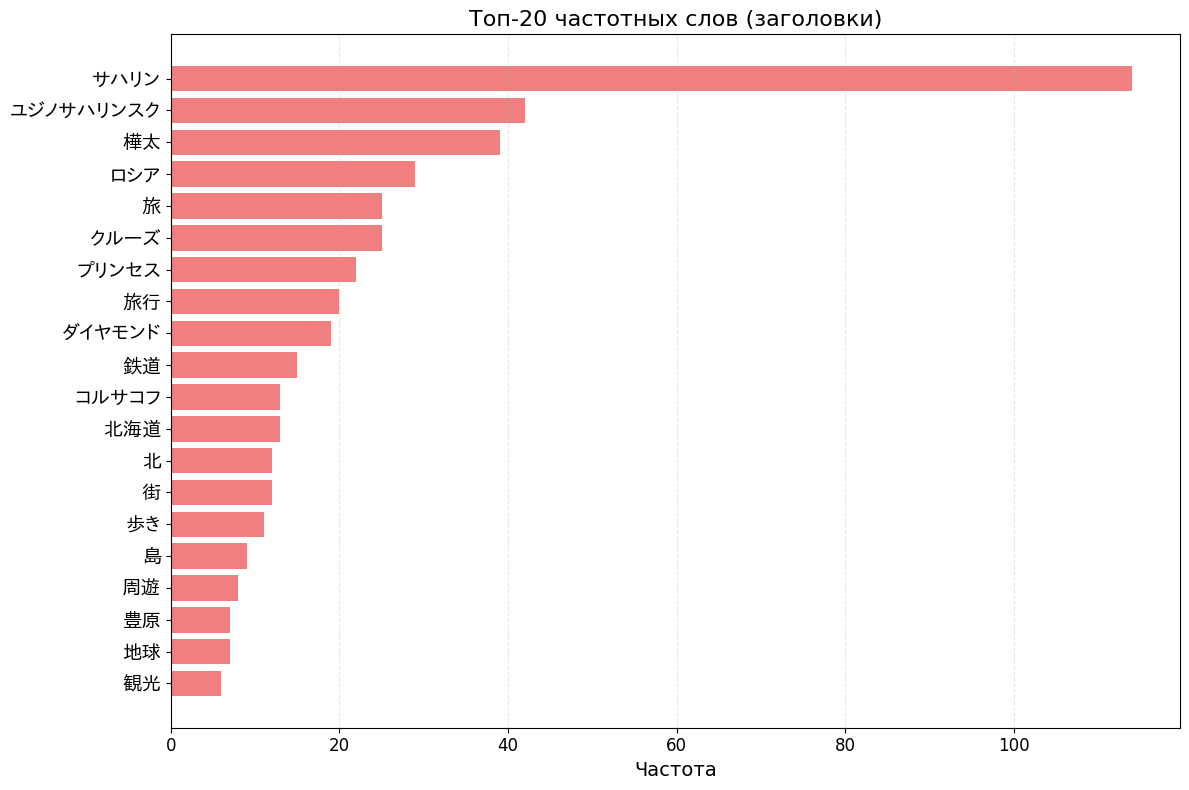

In [ ]:
# --- Построение столбчатых диаграмм ---

# Создаём объект шрифта для японских слов во избежание ошибок
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)

# --- Функция для построения горизонтальной столбчатой диаграммы топ-N слов ---
def plot_top_words(tokens_series, title="Топ слов", top_n=20, color='skyblue'):

    # Собираем все слова
    all_words = [word for sublist in tokens_series for word in sublist]
    word_counts = Counter(all_words)
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    # Построение графика
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(words)), counts[::-1], color=color)

    # Японские слова на оси Y
    plt.yticks(range(len(words)), words[::-1], fontproperties=jp_font, fontsize=14)

    # Подписи осей на русском
    plt.xlabel("Частота", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# --- Примеры использования ---
plot_top_words(df_travel['tokens_header_clean'],
               title="Топ-20 частотных слов (заголовки)",
               top_n=20,
               color='lightcoral')

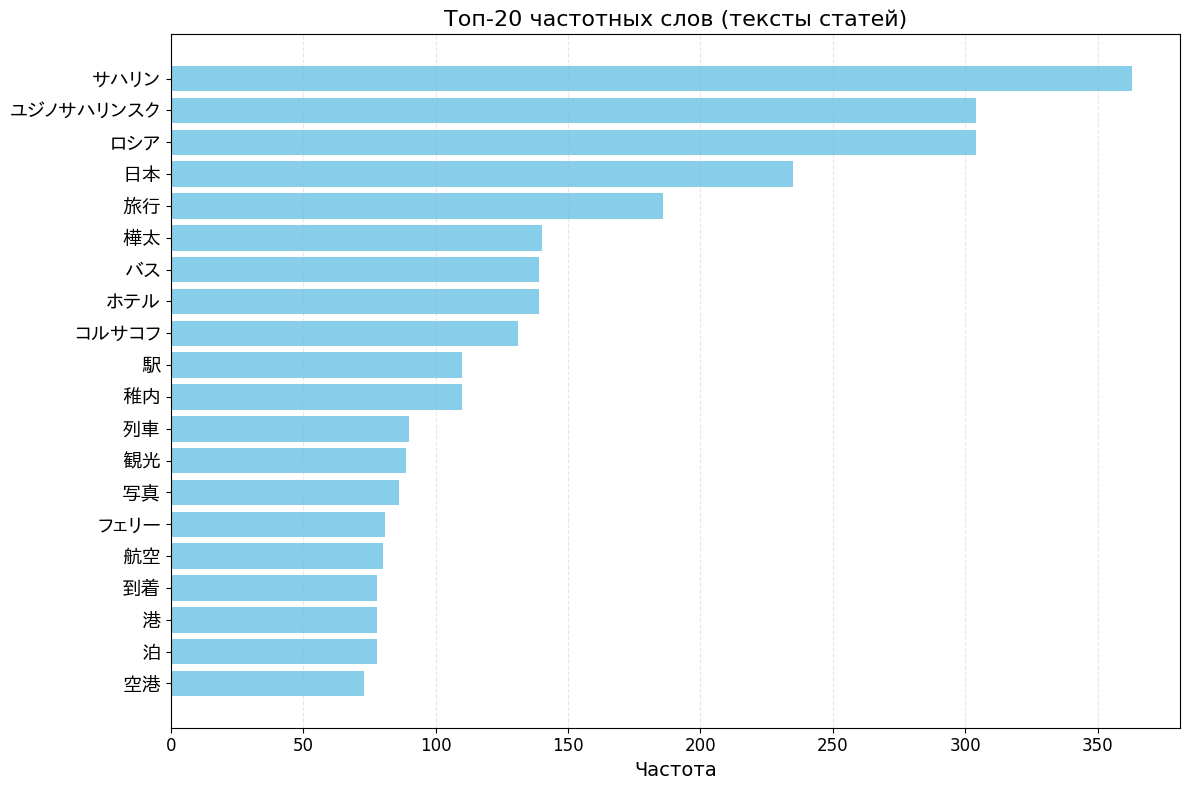

In [ ]:
plot_top_words(df_travel['tokens_body_clean'],
               title="Топ-20 частотных слов (тексты статей)",
               top_n=20,
               color='skyblue')

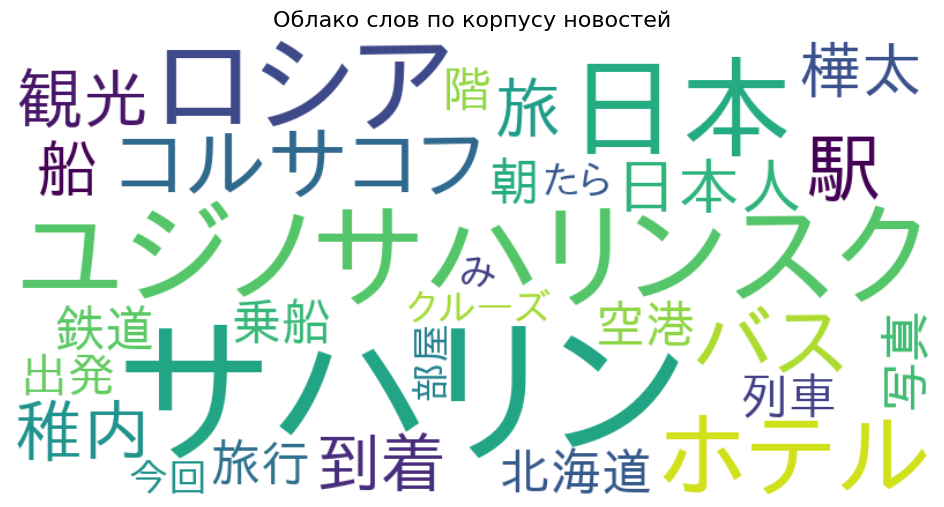

In [ ]:
# Построение облака слов по всему корпусу текстов (Заголовки + Тексты)


# --- Функция для создания облака слов из DataFrame ---
def create_wordcloud_from_df(df, columns, title="", max_words=30):

    # Объединяем все токены из всех колонок
    all_words = []
    for col in columns:
        for tokens in df[col]:
            all_words.extend(tokens)

    # Генерируем облако слов
    wc = WordCloud(
        font_path='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf',
        width=800,
        height=400,
        background_color='white',
        max_words=max_words
    ).generate(" ".join(all_words))

    # Отображаем
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

# --- Создаём общее облако слов для всех текстов ---
create_wordcloud_from_df(df_travel, columns=['tokens_header_clean', 'tokens_body_clean'], title="Облако слов по корпусу новостей")


In [ ]:
# --- Тематическое моделирование LDA ---

def run_lda(tokens_series, num_topics=3, num_words=10):

    # --- 1. Создаем словарь и корпус ---
    dictionary = corpora.Dictionary(tokens_series)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_series]

    # --- 2. Обучаем модель LDA ---
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto'
    )

    # --- 3. Выводим темы без коэффициентов ---
    print(f"\n📘 Топ-{num_topics} тем по запросу '樺太' (Karafuto):")
    for i in range(num_topics):
        topic_terms = lda_model.show_topic(i, topn=num_words)
        words_only = [word for word, _ in topic_terms]
        print(f"\n🎯 Тема {i+1}:")
        print(", ".join(words_only))

    return lda_model, corpus, dictionary

# --- Применение на текстах статей ---
lda_model, corpus, dictionary = run_lda(df_travel['tokens_body_clean'], num_topics=3, num_words=10)



📘 Топ-3 тем по запросу '樺太' (Karafuto):

🎯 Тема 1:
ユジノサハリンスク, ロシア, サハリン, 日本, 旅行, 樺太, ホテル, 港, 航空, 成田

🎯 Тема 2:
サハリン, ロシア, 日本, ユジノサハリンスク, バス, 旅行, コルサコフ, 稚内, ホテル, 樺太

🎯 Тема 3:
サハリン, ユジノサハリンスク, ロシア, 列車, 日本, 島, コルサコフ, フェリー, jp, travel


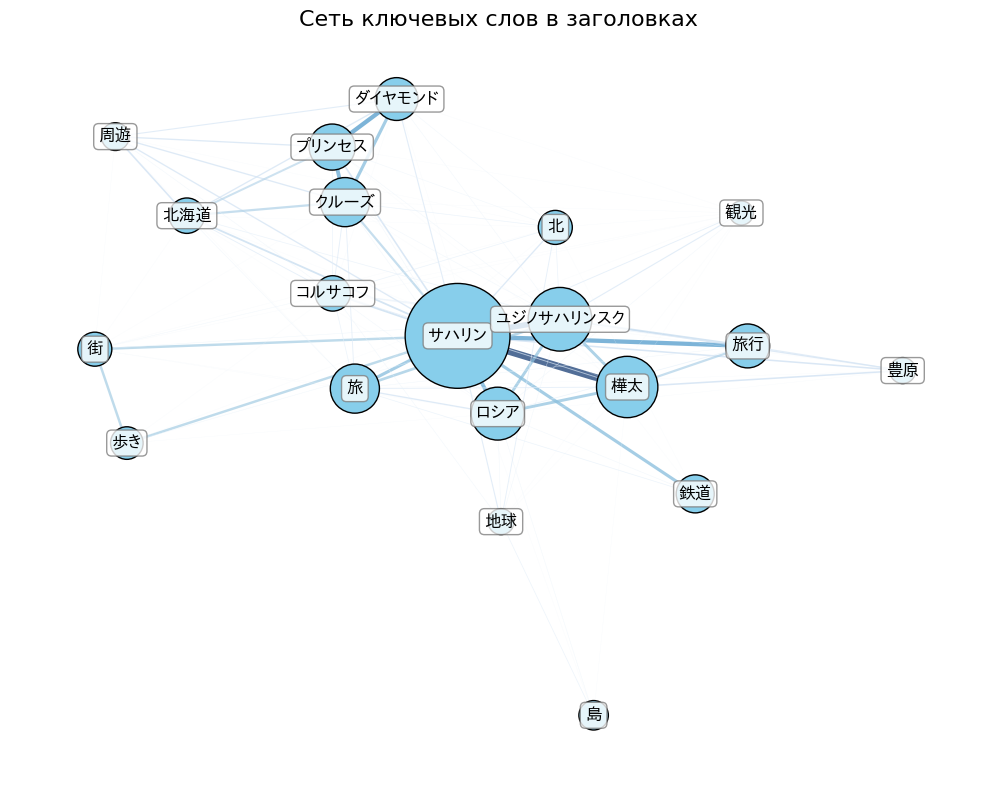

In [ ]:
# Сеть ключевых слов

# --- Шрифт для японских слов ---
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)



# --- Визуализация двух графов рядом (заголовки + тексты) ---
def plot_cooccurrence_graphs_side_by_side(df_karafuto, columns=['tokens_header_clean'],
                                          titles=['Заголовки'], top_n_words=20):
    plt.figure(figsize=(20, 8))

    for i, col in enumerate(columns):
        # --- Сбор топ-слов ---
        tokens_series = df_karafuto[col]
        all_words = [word for sublist in tokens_series for word in sublist]
        most_common_words = [w for w, _ in Counter(all_words).most_common(top_n_words)]

        # --- Создание графа ---
        G = nx.Graph()
        G.add_nodes_from(most_common_words)
        for doc_tokens in tokens_series:
            words_in_doc = set(doc_tokens).intersection(most_common_words)
            for w1, w2 in combinations(words_in_doc, 2):
                if G.has_edge(w1, w2):
                    G[w1][w2]['weight'] += 1
                else:
                    G.add_edge(w1, w2, weight=1)

        # --- Расположение узлов ---
        pos = nx.spring_layout(G, k=2, iterations=100, seed=42)

        # --- Настройка размеров узлов по частоте ---
        freq = Counter([w for sublist in tokens_series for w in sublist])
        node_sizes = [freq[n]*50 for n in G.nodes()]

        # --- Толщина и цвет рёбер ---
        weights = [d['weight'] for (u,v,d) in G.edges(data=True)]
        max_w = max(weights) if weights else 1
        widths = [w/max_w*5 for w in weights]
        colors = [plt.cm.Blues(w/max_w) for w in weights]

        # --- Рисуем узлы и рёбра ---
        plt.subplot(1, 2, i+1)
        nx.draw_networkx_nodes(G, pos, node_size=node_sizes,
                               node_color='skyblue' if col=='tokens_header_clean' else 'skyblue',
                               edgecolors='black')
        nx.draw_networkx_edges(G, pos, width=widths, edge_color=colors, alpha=0.7)

        # --- Подписи ---
        for node, (x, y) in pos.items():
            plt.text(
                x, y, node,
                fontproperties=jp_font,
                ha='center', va='center',
                fontsize=12,
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8, boxstyle='round,pad=0.3')
            )

        plt.title(titles[i], fontsize=16)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- Использование ---
plot_cooccurrence_graphs_side_by_side(df_travel,
                                      columns=['tokens_header_clean'],
                                      titles=['Сеть ключевых слов в заголовках'],
                                      top_n_words=20)
